# AUEB M.Sc. in Data Science (part-time)

**Course**: Numerical Optimization and Large Scale Linear ALgebra

**Semester**: Spring 2018

**1st homework**: Solving linear systems

**Author**: Spiros Politis

---

Σημείωση:

- Η υλοποίηση των μεθόδων θα πρέπει να γίνει με χρήση των κατάλληλων υπορουτίνων της βιβλιοθήκης LAPACK, CLAPACK, SCIPY ή NUMPY ανάλογα με την γλώσσα που χρησιμοποιείται.

- Η εργασία που θα παραδώσετε, εκτός του επαρκώς τεκμηριωμένου κώδικα, θα πρέπει να περιέχει και ένα αρχείο κειμένου με τις απαντήσεις, σχόλια και παρατηρήσεις σας επί της άσκησης.

---

## Γενικά σχόλια υλοποίησης

Η υλοποίηση έχει πραγματοποιηθεί εξ' ολοκλήρου από τον γράφοντα, με κώδικα αντικειμενοστραφούς λογικής σε γλώσσα προγραμματισμού Python.

Συνοπτικά, υλοποιήθηκαν οι παρακάτω κλάσεις Python:

- *DataHelper*: υλοποιεί όλες τις πηγές δεδομένων των ερωτημάτων (πίνακες, διανύσματα), την παραγωγή συστημάτων εξισώσεων για κάθε ερώτημα και την διαδικασία εκτέλεσης και παραγωγής των αποτελεσμάτων κάθε ερωτήματος.
    
- *VisualizationHelper*: υλοποιεί τις μεθόδους παραγωγής γραφημάτων της άσκησης.
    
- *GaussianElimination*: υλοποιεί τον αλγόριθμο απαλοιφής Gauss με μερική και ολική οδήγηση.

- *ShermanMorisson*: υλοποιεί την μέθοδο Sherman-Morisson για την επίλυση του ερωτήματος (4).

Προκειμένου να συλλέξουμε τα στατιστικά που απαιτούνται για τα ερώτηματα, δημιουργούμε πίνακες των οποίων τα στοιχεία είναι dictionaries που περιέχουν τα αποτελέσματα εκτέλεσης. Το κάθε dictionary περιέχει τα εξής στοιχεία:

- *method*: Μέθοδος οδήγησης
- *n*: Μέγεθος προβλήματος
- *process_time*: Συνολικός χρόνος εκτέλεσης
- *A*: Πίνακας Α του συστήματος
- *x*: Διάνυσμα x του συστήματος
- *b*: Διάνυσμα b του συστήματος
- *L*: Υπολογιζόμενος πίνακας L μετά από LU factorization
- *U*: Υπολογιζόμενος πίνακας U μετά από LU factorization
- *x_hat*: Διάνυσμα x, υπολογισμένο από την υλοποίηση επίλυσής μας
- *b_hat*: Διάνυσμα b, υπολογισμένο από την υλοποίηση επίλυσής μας
- *e_c*: Σφάλμα υπολογισμού
- *e_c_inf_norm*: Νόρμα απείρου του σφάλματος υπολογισμού
- *e_r*: Σφάλμα διόρθωσης
- *e_r_inf_norm*: Νόρμα απείρου του σφάλματος διόρθωσης
- *K_A*: Δείκτης κατάστασης του πίνακα A

## **Ερώτημα 1**

Να υλοποιήσετε σε γλώσσα προγραμματισμού Python, Fortran, C χρησιμοποιώντας τις αντίστοιχες βιβλιοθήκες, τον αλγόριθμο της απαλοιφής Gauss α) με μερική και β) με ολική οδήγηση.

### **Απάντηση**

Θεωρούμε ένα σύστημα $n$ εξισώσεων με $n$ αγνώστους, διατυπωμένο με την μορφή πινάκων ως:

$$Ax = b, A \in R^{n,n}, b \in R^{n} \;\;\;\;\;\;\;\;\;\; \tag{1.1}$$

με ορίζουσα $det(A) \neq 0$. 

Λόγω της τυχαιότητας επιλογής των πινάκων, κατά την παρούσα άσκηση, θεωρούμε ότι η ορίζουσα θα είναι μη αρνητική.

Τότε υπάρχει πίνακας μεταθέσεων γραμμών $P \in R^{n,n}$, πίνακας μεταθέσεων στηλών $Q \in R^{n,n}$, κάτω τριγωνικός πίνακας $L \in R^{n,n}, l_{ii} = 1, i = i \cdots n$ και αντιστρέψιμος άνω τριγωνικός πίνακας $U \in R^{n,n}$ ώστε η σχέση $\text{(1.1)}$ να μπορεί να γραφεί ως

$$PA = LU \;\;\;\;\;\;\;\;\;\; \tag{1.2}$$

$$PAQ = LU \;\;\;\;\;\;\;\;\;\; \tag{1.3}$$

Η σχέση $\text{(1.2)}$ αφορά στην περίπτωση **μερικής οδήγησης** ενώ η $\text{(1.3)}$ σε περίπτωση **ολικής οδήγησης**.

Ο πίνακας $P$ έχει την ιδιότητα, πολλαπλασιαζόμενος με τον $A$ από αριστερά, να ενεργεί στον $A$ μεταθέτοντας τις γραμμές του ενώ ο πίνακας $Q$, πολλαπλασιαζόμενος με τον $A$ από δεξιά, ενεργεί στον $A$ μεταθέτοντας τις στήλες του.

Οι ανωτέρω πίνακες θα έχουν τις παρακάτω γενικές μορφές:

$P$: μοναδιαίος πίνακας $I_{n,n}$ με εναλλαγές γραμμών:

$P: 
\begin{bmatrix}
    1 & 0 & \cdots & 0 \\
    0 & 1 & \cdots & 0 \\
    \vdots & \vdots & \ddots & \vdots \\
    0 & 0 & \cdots & 1
\end{bmatrix}
$

$Q$: μοναδιαίος πίνακας $I_{n,n}$ με εναλλαγές στηλών:

$Q: 
\begin{bmatrix}
    1 & 0 & \cdots & 0 \\
    0 & 1 & \cdots & 0 \\
    \vdots & \vdots & \ddots & \vdots \\
    0 & 0 & \cdots & 1
\end{bmatrix}
$

$L$: κάτω τριγωνικός πίνακας ($a_{ij} = 0$, $i < j$):

$L: 
\begin{bmatrix}
    a_{11} & 0 & \cdots & 0 \\
    a_{21} & a_{22} & \cdots & 0 \\
    \vdots & \vdots & \ddots & \vdots \\
    a_{n1} & a_{n2} & \cdots & a_{nn}
\end{bmatrix}
$

$U$: άνω τριγωνικός πίνακας ($a_{ij} = 0$, $i > j$):

$U: 
\begin{bmatrix}
    a_{11} & a_{12} & \cdots & a_{1n} \\
    0 & a_{22} & \cdots & a_{2n} \\
    \vdots & \vdots & \ddots & \vdots \\
    0 & 0 & \cdots & a_{nn}
\end{bmatrix}
$

Η παραγοντοποίηση $LU$ οδηγεί το σύστημα $Ax = b$ στην μορφή 

$$LUx = Pb \;\;\;\;\;\;\;\;\;\; \tag{1.4}$$

Προκειμένου να επιλυθεί το $2.1$, ακολουθούμε τα παρακάτω βήματα:

Εύρεση του $y$ στο σύστημα 

$$Ly = Pb \;\;\;\;\;\;\;\;\;\; \tag{1.5}$$

Εύρεση του $z$ στο σύστημα 

$$Uz = y \;\;\;\;\;\;\;\;\;\; \tag{1.6}$$

Εύρεση του $x$ στο σύστημα 

$$Q^{T}.x = z \;\;\;\;\;\;\;\;\;\; \tag{1.7}$$

Το $x$ που προκύπτει από την επίλυση του $1.7$ αποτελεί τη λύση του $1.4$, συνεκδοχικά και του $Ax = b$.

Στην απαλοιφή Gauss με **μερική οδήγηση**, όταν απαλείφουμε τον $k$ άγνωστο, δηλαδή στο βήμα $k$, εναλλάσσουμε την $k$ γραμμή με αυτήν που έχει το μεγαλύτερο κατά απόλυτη τιμή στοιχείο στην $k$ στήλη.

Στην απαλοιφή Gauss με **ολική οδήγηση**, όταν απαλείφουμε τον $k$ άγνωστο, δηλαδή στο βήμα $k$, εναλλάσσουμε την $k$ γραμμή και στήλη με με αυτήν που περιέχει το μεγαλύτερο κατά απόλυτη τιμή στοιχείο του πίνακα $Α$.

**Περί αριθμητικής ακρίβειας**

Σε όλα τα σημεία που πραγματοποιούνται υπολογισμοί χρησιμοποιούνται αναπαραστάσεις μηχανής των φυσικών αριθμών βασισμένες στο πρότυπο *IEEE754 double precision*. Στην γλώσσα προγραμματισμού *Python*, στο πακέτο *Numpy*, οι αναπαραστάσεις αυτές είναι τύπου *np.float64*.

### Επικύρωση υλοποίησης

In [1]:
import sys
import numpy as np

Εισάγουμε τον κώδικα που υλοποιήσαμε:

In [2]:
sys.path.append('code')

from DataHelper import DataHelper
from GaussianElimination import GaussianElimination
from VisualizationHelper import VisualizationHelper

In [3]:
data_helper = DataHelper()
visualization_helper = VisualizationHelper()

Για επιβεβαίωση της λύσης μας, θα χρησιμοποιήσουμε τυχαία προσδιορισμένο σύστημα $Ax = b$, το οποίο παράγουμε με τυχαία,  γνωστά $Α$, $x$, ώστε το εσωτερικό γινόμενο $Ax$ να παράγει το $b$.

Θεωρούμε, επομένως, σύστημα $64$ εξισώσεων και $64$ αγνώστων, αναπαριστάμενο σε μορφή πινάκων ως εξής:

In [4]:
A, x, b = data_helper.compute_A_x_b(n = 64)

In [5]:
print(A)

[[0.8086051  0.97391893 0.41410152 ... 0.55649999 0.10716787 0.71800409]
 [0.61361754 0.37301716 0.61285755 ... 0.49063814 0.79547895 0.74370463]
 [0.9151956  0.03145612 0.13987521 ... 0.2267302  0.35439242 0.17841748]
 ...
 [0.34035624 0.07375596 0.00875229 ... 0.96165249 0.97993398 0.97034885]
 [0.7603961  0.36292326 0.57870733 ... 0.10350024 0.51474547 0.96807373]
 [0.21243909 0.21264776 0.66937186 ... 0.65169574 0.79792748 0.60706436]]


In [6]:
print(x)

[3.41888801e-01 3.36229975e-01 5.27565321e-01 8.36244528e-02
 3.55272543e-01 1.73627856e-01 6.08876255e-01 9.73647833e-01
 3.44608518e-01 4.05352368e-01 8.01326705e-01 2.10823555e-01
 3.18579928e-01 8.53638069e-01 8.26123033e-01 4.83622042e-01
 2.89799718e-01 6.23022769e-01 2.64899277e-01 3.95488089e-01
 8.05136777e-01 8.13722671e-01 8.93327818e-01 2.82515819e-01
 7.93635120e-01 6.65521850e-01 2.87330448e-01 4.21735762e-01
 9.12498843e-04 6.87133694e-01 6.04289486e-01 4.66434646e-01
 4.27904643e-01 5.95405862e-01 7.90699792e-01 3.23658168e-02
 1.57905435e-01 2.51962360e-01 7.56537092e-02 1.82855969e-01
 2.24833543e-01 4.34287935e-01 4.58424272e-01 5.40390881e-01
 6.98998058e-01 5.25426843e-01 1.24571307e-01 7.23355032e-01
 5.52738819e-01 9.43764451e-01 6.62755820e-01 3.77615514e-01
 6.36277246e-01 4.62474413e-01 9.15659630e-01 4.28848779e-01
 8.91139984e-01 7.45421259e-01 8.75181357e-01 2.08333231e-01
 9.02423700e-01 3.07571863e-01 6.89203464e-01 1.82738075e-01]


In [7]:
print(b)

[17.35096218 17.31013057 16.37269504 14.27586778 13.69387331 15.50638835
 14.80769266 16.08000681 17.65131664 18.64810187 15.91624499 16.29958488
 15.9938553  15.64826509 15.85756834 15.70824706 16.60365328 18.32834669
 13.52331994 16.08921269 16.50358417 15.52403195 17.20151329 15.8905399
 16.46351253 16.29184343 17.4398122  18.59034206 15.67855603 14.40621524
 16.08586187 15.02595385 15.03350458 17.5375452  14.45203473 16.7776556
 14.00419622 15.07625441 16.05221783 16.29684512 14.37933756 17.20353215
 16.6061217  16.17529631 14.14027314 17.43139071 14.84403226 17.18891639
 17.26809773 14.37885618 17.09224705 16.55389942 17.03619027 16.84695234
 14.24459886 15.4187856  15.22814361 14.74193175 17.7455923  16.26091066
 15.55467799 16.28256938 17.86620298 14.29090535]


### (α) Μερική οδήγηση

In [9]:
%%time
g_pp = GaussianElimination(with_progress_bar = True)
g_pp = g_pp.solve(A, b, pivoting = 'partial')

Elimination (n = 64): 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 63/63 [00:00<00:00, 2739.05it/s]


Wall time: 63 ms


#### Έλεγχος PA = LU

Ελέγχουμε ότι έχουμε προβεί σε σωστή παραγοντοποίηση του $A$, μετά την εφαρμογή **μερικής οδήγησης**, έτσι ώστε να ισχύει $PA = LU$:

In [10]:
%%time

g_pp_PA = g_pp.PAQ

print(g_pp_PA)

[[0.95202806 0.40957095 0.47958921 ... 0.4886032  0.20281807 0.70667457]
 [0.4282845  0.97720987 0.56748279 ... 0.47338678 0.84482778 0.7146706 ]
 [0.61002334 0.35618789 0.99490821 ... 0.30667585 0.18447554 0.13188493]
 ...
 [0.67034511 0.47267994 0.14649707 ... 0.99378827 0.27166452 0.58935877]
 [0.31672532 0.47956178 0.55290233 ... 0.05318811 0.7963426  0.26583746]
 [0.85185108 0.73615781 0.18004216 ... 0.49244713 0.6486837  0.85446935]]
Wall time: 4 ms


In [11]:
%%time

g_pp_LU = g_pp.LU

print(g_pp_LU)

[[0.95202806 0.40957095 0.47958921 ... 0.4886032  0.20281807 0.70667457]
 [0.4282845  0.97720987 0.56748279 ... 0.47338678 0.84482778 0.7146706 ]
 [0.61002334 0.35618789 0.99490821 ... 0.30667585 0.18447554 0.13188493]
 ...
 [0.67034511 0.47267994 0.14649707 ... 0.99378827 0.27166452 0.58935877]
 [0.31672532 0.47956178 0.55290233 ... 0.05318811 0.7963426  0.26583746]
 [0.85185108 0.73615781 0.18004216 ... 0.49244713 0.6486837  0.85446935]]
Wall time: 4 ms


In [12]:
%%time

print(np.allclose(g_pp_PA, g_pp_LU, rtol = 1e-16))

True
Wall time: 2.99 ms


Σημείωση: αν και η συνάρτηση που επιστρέφει την σχέση $PAQ$ είναι ίδια, τόσο για μερική όσο για ολική οδήγηση, στην περίπτωση της μερικής οδήγησης ο πίνακας $Q$ είναι ο μοναδιαίος. Επομένως, δεν επιφέρει καμμία μεταβολή πάνω στις στήλες του $U$ και η συνάρτηση είναι ισοδύναμη με $PA$.

#### Έλεγχος της λύσης του συστήματος με μερική οδήγηση

Ελέγχουμε ότι η λύση που παρέχει ο αλγόριθμός μας είναι σωστή, σε σχέση με το package *Numpy.linalg* της *Python*:

In [13]:
%%time

# Numpy solution
g_pp_numpy_linalg = np.linalg.solve(A, b)

print(g_pp_numpy_linalg)

[3.41888801e-01 3.36229975e-01 5.27565321e-01 8.36244528e-02
 3.55272543e-01 1.73627856e-01 6.08876255e-01 9.73647833e-01
 3.44608518e-01 4.05352368e-01 8.01326705e-01 2.10823555e-01
 3.18579928e-01 8.53638069e-01 8.26123033e-01 4.83622042e-01
 2.89799718e-01 6.23022769e-01 2.64899277e-01 3.95488089e-01
 8.05136777e-01 8.13722671e-01 8.93327818e-01 2.82515819e-01
 7.93635120e-01 6.65521850e-01 2.87330448e-01 4.21735762e-01
 9.12498843e-04 6.87133694e-01 6.04289486e-01 4.66434646e-01
 4.27904643e-01 5.95405862e-01 7.90699792e-01 3.23658168e-02
 1.57905435e-01 2.51962360e-01 7.56537092e-02 1.82855969e-01
 2.24833543e-01 4.34287935e-01 4.58424272e-01 5.40390881e-01
 6.98998058e-01 5.25426843e-01 1.24571307e-01 7.23355032e-01
 5.52738819e-01 9.43764451e-01 6.62755820e-01 3.77615514e-01
 6.36277246e-01 4.62474413e-01 9.15659630e-01 4.28848779e-01
 8.91139984e-01 7.45421259e-01 8.75181357e-01 2.08333231e-01
 9.02423700e-01 3.07571863e-01 6.89203464e-01 1.82738075e-01]
Wall time: 13 ms


In [14]:
%%time

# Our solution
g_pp_x = g_pp.x

print(g_pp_x)

[3.41888801e-01 3.36229975e-01 5.27565321e-01 8.36244528e-02
 3.55272543e-01 1.73627856e-01 6.08876255e-01 9.73647833e-01
 3.44608518e-01 4.05352368e-01 8.01326705e-01 2.10823555e-01
 3.18579928e-01 8.53638069e-01 8.26123033e-01 4.83622042e-01
 2.89799718e-01 6.23022769e-01 2.64899277e-01 3.95488089e-01
 8.05136777e-01 8.13722671e-01 8.93327818e-01 2.82515819e-01
 7.93635120e-01 6.65521850e-01 2.87330448e-01 4.21735762e-01
 9.12498843e-04 6.87133694e-01 6.04289486e-01 4.66434646e-01
 4.27904643e-01 5.95405862e-01 7.90699792e-01 3.23658168e-02
 1.57905435e-01 2.51962360e-01 7.56537092e-02 1.82855969e-01
 2.24833543e-01 4.34287935e-01 4.58424272e-01 5.40390881e-01
 6.98998058e-01 5.25426843e-01 1.24571307e-01 7.23355032e-01
 5.52738819e-01 9.43764451e-01 6.62755820e-01 3.77615514e-01
 6.36277246e-01 4.62474413e-01 9.15659630e-01 4.28848779e-01
 8.91139984e-01 7.45421259e-01 8.75181357e-01 2.08333231e-01
 9.02423700e-01 3.07571863e-01 6.89203464e-01 1.82738075e-01]
Wall time: 4.01 ms


In [15]:
%%time

# Comparison
print(np.allclose(g_pp_numpy_linalg, g_pp_x, rtol = 1e-16))

True
Wall time: 2.04 ms


### (β) Ολική οδήγηση

In [16]:
%%time

g_fp = GaussianElimination(with_progress_bar = True)
g_fp = g_fp.solve(A, b, pivoting = 'full')

Elimination (n = 64): 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 63/63 [00:00<00:00, 2421.68it/s]


Wall time: 70 ms


#### Έλεγχος PAQ = LU

Ελέγχουμε ότι έχουμε προβεί σε σωστή παραγοντοποίηση του $A$, μετά την εφαρμογή **ολικής οδήγησης**, έτσι ώστε να ισχύει $PAQ = LU$:

In [17]:
%%time

g_fp_PAQ = g_fp.PAQ

print(g_fp_PAQ)

[[0.99997434 0.88227942 0.64040681 ... 0.33549158 0.30972196 0.51680759]
 [0.12270511 0.99965456 0.30816181 ... 0.00785834 0.15723983 0.34068976]
 [0.38728263 0.64794647 0.9994955  ... 0.17965653 0.672528   0.4863757 ]
 ...
 [0.17273787 0.24105054 0.80598175 ... 0.71396644 0.31056426 0.62395512]
 [0.9909333  0.83260616 0.23582069 ... 0.36046668 0.58957034 0.15388359]
 [0.25390519 0.29823302 0.20186865 ... 0.5908514  0.24189721 0.27555519]]
Wall time: 4 ms


In [18]:
%%time

g_fp_LU = g_fp.LU

print(g_fp_LU)

[[0.99997434 0.88227942 0.64040681 ... 0.33549158 0.30972196 0.51680759]
 [0.12270511 0.99965456 0.30816181 ... 0.00785834 0.15723983 0.34068976]
 [0.38728263 0.64794647 0.9994955  ... 0.17965653 0.672528   0.4863757 ]
 ...
 [0.17273787 0.24105054 0.80598175 ... 0.71396644 0.31056426 0.62395512]
 [0.9909333  0.83260616 0.23582069 ... 0.36046668 0.58957034 0.15388359]
 [0.25390519 0.29823302 0.20186865 ... 0.5908514  0.24189721 0.27555519]]
Wall time: 4 ms


In [19]:
%%time

print(np.allclose(g_fp_PAQ, g_fp_LU, rtol = 1e-16))

True
Wall time: 3 ms


#### Έλεγχος της λύσης του συστήματος με ολική οδήγηση

Ελέγχουμε ότι η λύση που παρέχει ο αλγόριθμός μας είναι σωστή, σε σχέση με το package *Numpy.linalg* της *Python*:

In [20]:
%%time

# Numpy solution
g_fp_numpy_linalg = np.linalg.solve(A, b)

print(g_fp_numpy_linalg)

[3.41888801e-01 3.36229975e-01 5.27565321e-01 8.36244528e-02
 3.55272543e-01 1.73627856e-01 6.08876255e-01 9.73647833e-01
 3.44608518e-01 4.05352368e-01 8.01326705e-01 2.10823555e-01
 3.18579928e-01 8.53638069e-01 8.26123033e-01 4.83622042e-01
 2.89799718e-01 6.23022769e-01 2.64899277e-01 3.95488089e-01
 8.05136777e-01 8.13722671e-01 8.93327818e-01 2.82515819e-01
 7.93635120e-01 6.65521850e-01 2.87330448e-01 4.21735762e-01
 9.12498843e-04 6.87133694e-01 6.04289486e-01 4.66434646e-01
 4.27904643e-01 5.95405862e-01 7.90699792e-01 3.23658168e-02
 1.57905435e-01 2.51962360e-01 7.56537092e-02 1.82855969e-01
 2.24833543e-01 4.34287935e-01 4.58424272e-01 5.40390881e-01
 6.98998058e-01 5.25426843e-01 1.24571307e-01 7.23355032e-01
 5.52738819e-01 9.43764451e-01 6.62755820e-01 3.77615514e-01
 6.36277246e-01 4.62474413e-01 9.15659630e-01 4.28848779e-01
 8.91139984e-01 7.45421259e-01 8.75181357e-01 2.08333231e-01
 9.02423700e-01 3.07571863e-01 6.89203464e-01 1.82738075e-01]
Wall time: 16 ms


In [21]:
%%time

# Our solution
g_fp_x = g_fp.x

print(g_fp_x)

[3.41888801e-01 3.36229975e-01 5.27565321e-01 8.36244528e-02
 3.55272543e-01 1.73627856e-01 6.08876255e-01 9.73647833e-01
 3.44608518e-01 4.05352368e-01 8.01326705e-01 2.10823555e-01
 3.18579928e-01 8.53638069e-01 8.26123033e-01 4.83622042e-01
 2.89799718e-01 6.23022769e-01 2.64899277e-01 3.95488089e-01
 8.05136777e-01 8.13722671e-01 8.93327818e-01 2.82515819e-01
 7.93635120e-01 6.65521850e-01 2.87330448e-01 4.21735762e-01
 9.12498843e-04 6.87133694e-01 6.04289486e-01 4.66434646e-01
 4.27904643e-01 5.95405862e-01 7.90699792e-01 3.23658168e-02
 1.57905435e-01 2.51962360e-01 7.56537092e-02 1.82855969e-01
 2.24833543e-01 4.34287935e-01 4.58424272e-01 5.40390881e-01
 6.98998058e-01 5.25426843e-01 1.24571307e-01 7.23355032e-01
 5.52738819e-01 9.43764451e-01 6.62755820e-01 3.77615514e-01
 6.36277246e-01 4.62474413e-01 9.15659630e-01 4.28848779e-01
 8.91139984e-01 7.45421259e-01 8.75181357e-01 2.08333231e-01
 9.02423700e-01 3.07571863e-01 6.89203464e-01 1.82738075e-01]
Wall time: 5 ms


In [22]:
%%time

# Comparison
print(np.allclose(g_fp_numpy_linalg, g_fp_x, rtol = 1e-16))

True
Wall time: 2.99 ms


---

In [23]:
# Execution counter for producing graphs with incremental file names.
run = 0

In [24]:
run += 1

---

## **Ερώτημα 2**

Χρησιμοποιώντας τα παραπάνω προγράμματα να επιλύσετε τουλάχιστον 5, τυχαία, γραμμικά συστήματα της μορφής:

$$A_{n}x = b \;\;\;\;\; A_{n} \in R^{n×n}, x, b \in R^{n}$$

η λύση των οποίων θα είναι εκ των προτέρων γνωστή, χρησιμοποιώντας κατάλληλο $b$. Ελέγχοντας τις τιμές $n = 64, 128, 256, 512, 1024, 2048$ προβλέψτε πώς συμπεριφέρεται η νόρμα $\infty$ του σφάλματος και της διόρθωσης σε συνάρτηση με τον δείκτη κατάστασης του πίνακα $A$ καθώς η διάσταση $n$. Να γίνει σύγκριση του χρόνου που απασχολήθηκε ο επεξεργαστής (CPU time) σε όλες τις περιπτώσεις και για τις δύο μεθόδους. Τι συμπέρασμα συνάγετε ως προς την αποδοτικότητα των μεθόδων;

### **Απάντηση**

In [25]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [26]:
%matplotlib inline

In [27]:
import sys
from time import gmtime, strftime
import numpy as np

from IPython.display import Image, HTML, display
from glob import glob

In [28]:
sys.path.append('code')

from DataHelper import DataHelper
from GaussianElimination import GaussianElimination
from VisualizationHelper import VisualizationHelper

In [29]:
data_helper = DataHelper()
visualization_helper = VisualizationHelper()

Καθορισμός των παραμέτρων ($n$ = μέγεθος προβλήματος) και εκτέλεση των αλγοριθμικών επαναλήψεων: 

In [30]:
%%time

# Define problem sizes.
system_sizes = np.array([
    64, 128, 256, 512, 1024, 2048
])

# Produce the system of equations required.
systems_2 = data_helper.compute_systems_part_2(system_sizes)

Wall time: 163 ms


In [31]:
%%time

# Execute iterations for partial pivoting.
pp_iterations_2 = data_helper.compute_gauss_iterations(systems = systems_2, pivoting = 'partial', with_progress_bar = True)

Elimination (n = 2048): 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2047/2047 [00:22<00:00, 90.51it/s]


Wall time: 1min 35s


In [32]:
%%time

# Execute iterations for full pivoting.
fp_iterations_2 = data_helper.compute_gauss_iterations(systems = systems_2, pivoting = 'full', with_progress_bar = True)

Elimination (n = 2048): 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2047/2047 [00:19<00:00, 104.87it/s]


Wall time: 1min 53s


#### Εκτύπωση στατιστικών

Για τη μέθοδο μερικής οδήγησης:

In [33]:
data_helper.print_statistics(pp_iterations_2)

,Μέγεθος προβλήματος (n),Μέθοδος οδήγησης,Χρόνος υπολογισμού (milliseconds),Δείκτης κατάστασης Α,Νόρμα απείρου σφάλματος υπολογισμού,Νόρμα απείρου σφάλματος διόρθωσης
0,64,partial,61.004639,6.588551e+03,9.975354e-13,4.618528e-13
1,128,partial,168.988705,2.213368e+04,2.703041e-11,5.826450e-12
2,256,partial,585.988998,8.908254e+04,9.831863e-11,3.880984e-11
3,512,partial,4356.986046,3.215682e+04,2.252642e-10,1.297167e-10
4,1024,partial,12087.917328,9.413335e+04,2.118881e-09,1.399144e-09
5,2048,partial,77063.630104,1.967216e+06,1.867149e-06,1.525875e-07


Για τη μέθοδο ολικής οδήγησης:

In [34]:
data_helper.print_statistics(fp_iterations_2)

,Μέγεθος προβλήματος (n),Μέθοδος οδήγησης,Χρόνος υπολογισμού (milliseconds),Δείκτης κατάστασης Α,Νόρμα απείρου σφάλματος υπολογισμού,Νόρμα απείρου σφάλματος διόρθωσης
0,64,full,65.006018,6.588551e+03,2.750022e-12,6.039613e-13
1,128,full,122.991800,2.213368e+04,5.396184e-12,2.621903e-12
2,256,full,289.995193,8.908254e+04,6.828549e-11,1.115552e-11
3,512,full,2155.988216,3.215682e+04,6.600238e-10,5.166783e-10
4,1024,full,17912.585258,9.413335e+04,2.104657e-09,1.126182e-09
5,2048,full,91855.612755,1.967216e+06,4.604240e-08,4.375693e-09


Στατιστκά σφάλματος (συγκριτικά):

In [35]:
data_helper.print_error_statistics([pp_iterations_2, fp_iterations_2])

,Μέγεθος προβλήματος (n),Δείκτης κατάστασης Α,Νόρμα απείρου σφάλματος υπολογισμού (μερική οδήγηση),Νόρμα απείρου σφάλματος υπολογισμού (ολική οδήγηση),Διαφορά νόρμας απείρου σφάλματος υπολογισμού,Νόρμα απείρου σφάλματος διόρθωσης (μερική οδήγηση),Νόρμα απείρου σφάλματος διόρθωσης (ολική οδήγηση),Διαφορά νόρμας απείρου σφάλματος διόρθωσης
0,64,6.588551e+03,9.975354e-13,2.750022e-12,-1.752487e-12,4.618528e-13,6.039613e-13,-1.421085e-13
1,128,2.213368e+04,2.703041e-11,5.396184e-12,2.163422e-11,5.826450e-12,2.621903e-12,3.204548e-12
2,256,8.908254e+04,9.831863e-11,6.828549e-11,3.003314e-11,3.880984e-11,1.115552e-11,2.765432e-11
3,512,3.215682e+04,2.252642e-10,6.600238e-10,-4.347596e-10,1.297167e-10,5.166783e-10,-3.869616e-10
4,1024,9.413335e+04,2.118881e-09,2.104657e-09,1.422425e-11,1.399144e-09,1.126182e-09,2.729621e-10
5,2048,1.967216e+06,1.867149e-06,4.604240e-08,1.821107e-06,1.525875e-07,4.375693e-09,1.482118e-07


#### 2.1. Γράφημα κατάστασης του πίνακα $A$ ως προς το σφάλμα υπολογισμού με μερική οδήγηση

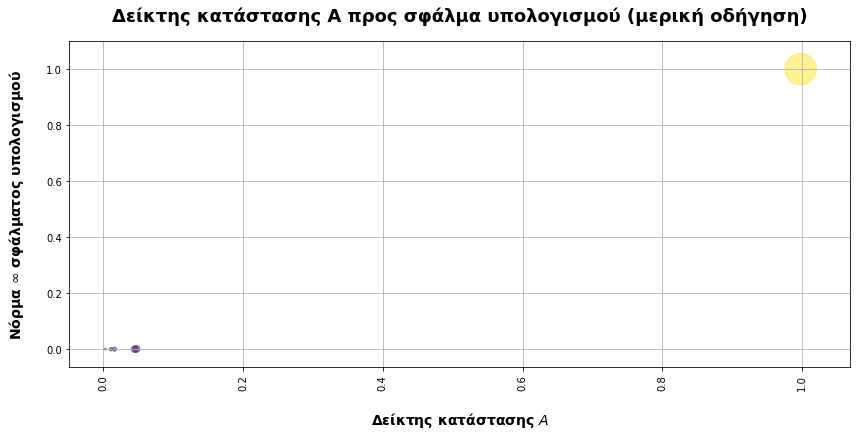

In [36]:
fig, ax = visualization_helper.plot_k_vs_e(
    pp_iterations_2, 
    x = 'K_A', 
    y = 'e_c_inf_norm', 
    x_label = 'Δείκτης κατάστασης $A$', 
    y_label = 'Νόρμα $\infty$ σφάλματος υπολογισμού', 
    label = 'Δείκτης κατάστασης A προς σφάλμα υπολογισμού (μερική οδήγηση)', 
    with_lines = False, 
    interpolation_factor = None, 
    dot_scaling = 1e+3, 
    normalize_axes = True
)

# fig.savefig('graphs/' + str(run) + '-Q2-Cond-CompErr-PP' + '.png')

pass;

#### 2.2. Γράφημα κατάστασης του πίνακα $A$ ως προς το σφάλμα υπολογισμού με ολική οδήγηση

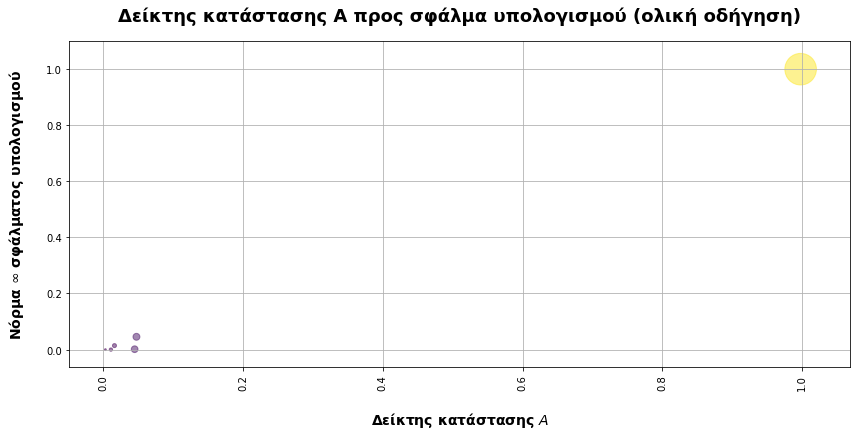

In [37]:
fig, ax = visualization_helper.plot_k_vs_e(
    fp_iterations_2, 
    x = 'K_A', 
    y = 'e_c_inf_norm', 
    x_label = 'Δείκτης κατάστασης $A$', 
    y_label = 'Νόρμα $\infty$ σφάλματος υπολογισμού', 
    label = 'Δείκτης κατάστασης A προς σφάλμα υπολογισμού (ολική οδήγηση)', 
    with_lines = False, 
    interpolation_factor = None, 
    dot_scaling = 1e+3, 
    normalize_axes = True
)

# fig.savefig('graphs/' + str(run) + '-Q2-Cond-CompErr-FP' + '.png')

pass;

#### 2.3. Γράφημα κατάστασης του πίνακα $A$ ως προς το σφάλμα διόρθωσης με μερική οδήγηση

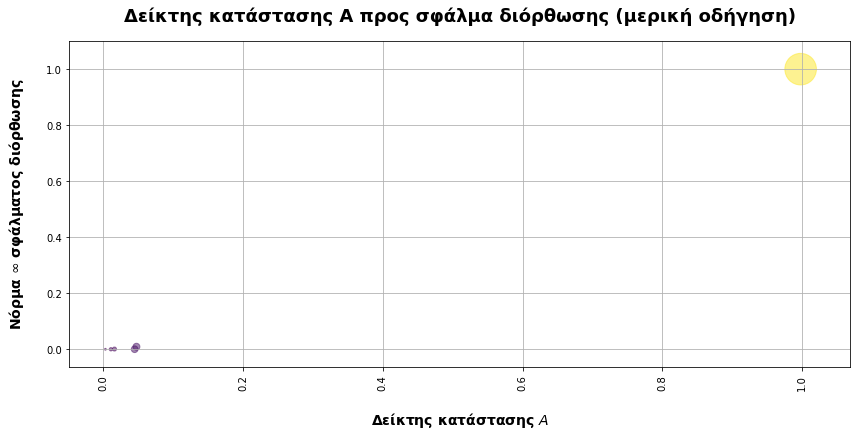

In [38]:
fig, ax = visualization_helper.plot_k_vs_e(
    pp_iterations_2, 
    x = 'K_A', 
    y = 'e_r_inf_norm', 
    x_label = 'Δείκτης κατάστασης $A$', 
    y_label = 'Νόρμα $\infty$ σφάλματος διόρθωσης', 
    label = 'Δείκτης κατάστασης A προς σφάλμα διόρθωσης (μερική οδήγηση)', 
    with_lines = False, 
    interpolation_factor = None, 
    dot_scaling = 1e+3, 
    normalize_axes = True
)

# fig.savefig('graphs/' + str(run) + '-Q2-Cond-CorErr-PP' + '.png')

pass;

#### 2.4. Γράφημα κατάστασης του πίνακα $A$ ως προς το σφάλμα διόρθωσης με ολική οδήγηση

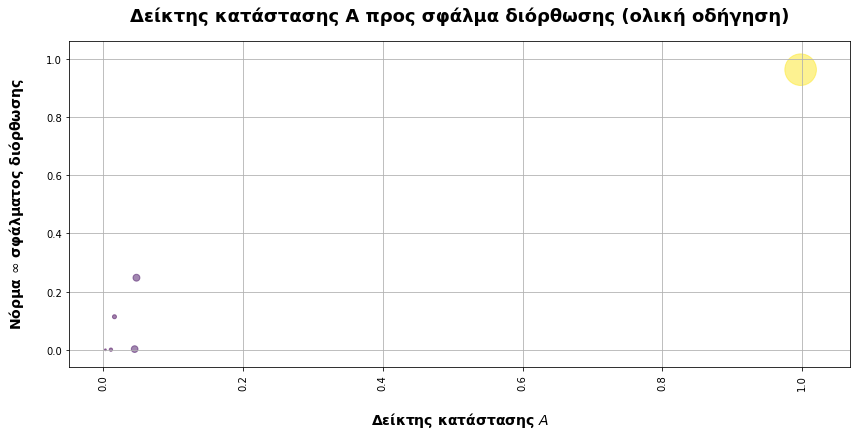

In [39]:
fig, ax = visualization_helper.plot_k_vs_e(
    fp_iterations_2, 
    x = 'K_A', 
    y = 'e_r_inf_norm', 
    x_label = 'Δείκτης κατάστασης $A$', 
    y_label = 'Νόρμα $\infty$ σφάλματος διόρθωσης', 
    label = 'Δείκτης κατάστασης A προς σφάλμα διόρθωσης (ολική οδήγηση)', 
    with_lines = False, 
    interpolation_factor = None, 
    dot_scaling = 1e+3, 
    normalize_axes = True
)

# fig.savefig('graphs/' + str(run) + '-Q2-Cond-CorErr-FP' + '.png')

pass;

##### 2.5 Μέσο σφάλμα υπολογισμού ανά μέγεθος προβλήματος και μερική & ολική οδήγηση

Προκειμένου να υπολογίσουμε το **μέσο σφάλμα υπολογισμού** για κάθε μέθοδο, είμαστε υποχρεωμένοι να εκτελέσουμε πολλές επαναλήψεις, για το ίδιο μέγεθος προβλήματος, καθώς τα συστήματα που παράγονται είναι τυχαία. 

In [39]:
%%time

# Define problem sizes.
system_sizes = np.array([
    64, 128, 256, 512, 1024, 2048,
    64, 128, 256, 512, 1024, 2048,
    64, 128, 256, 512, 1024, 2048,
    64, 128, 256, 512, 1024, 2048,
    64, 128, 256, 512, 1024, 2048,
    64, 128, 256, 512, 1024, 2048,
    64, 128, 256, 512, 1024, 2048,
    64, 128, 256, 512, 1024, 2048,
    64, 128, 256, 512, 1024, 2048,
    64, 128, 256, 512, 1024, 2048
])

# Produce the system of equations required.
systems_2_m = data_helper.compute_systems_part_2(system_sizes)

CPU times: user 3.05 s, sys: 103 ms, total: 3.15 s
Wall time: 395 ms


In [40]:
%%time

# Execute iterations for partial pivoting.
pp_iterations_2_m = data_helper.compute_gauss_iterations(systems = systems_2_m, pivoting = 'partial', with_progress_bar = False)

CPU times: user 10min 42s, sys: 4min 35s, total: 15min 17s
Wall time: 4min 2s


In [41]:
%%time

# Execute iterations for full pivoting.
fp_iterations_2_m = data_helper.compute_gauss_iterations(systems = systems_2_m, pivoting = 'full', with_progress_bar = False)

CPU times: user 20min 46s, sys: 7.38 s, total: 20min 53s
Wall time: 4min 43s


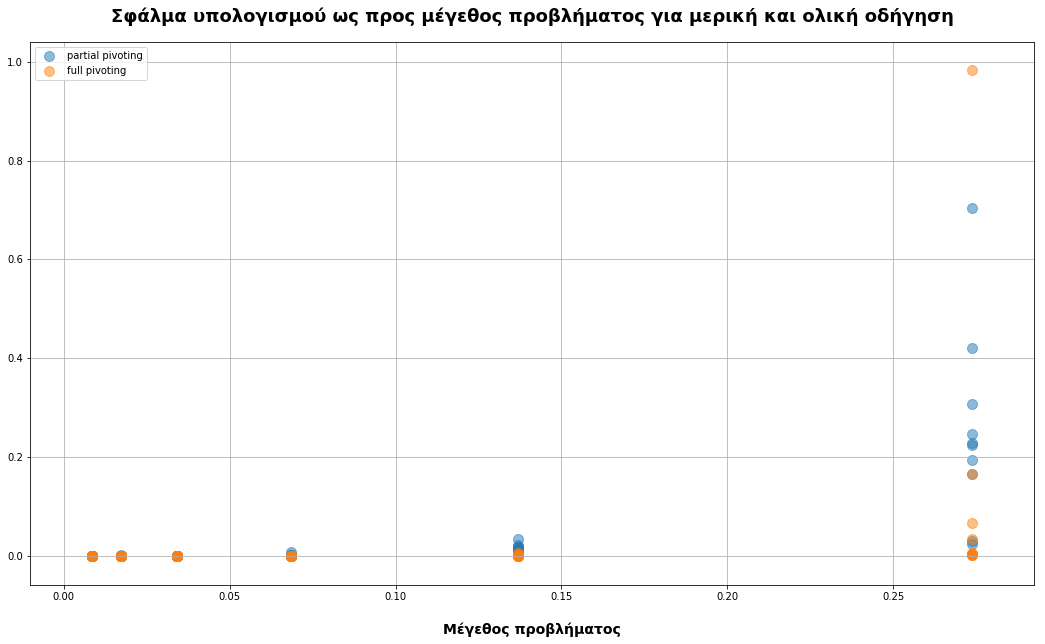

In [42]:
fig, ax = visualization_helper.plot_n_vs_e(
    [pp_iterations_2_m, fp_iterations_2_m], 
    y = 'e_c_inf_norm',
    label = 'Σφάλμα υπολογισμού ως προς μέγεθος προβλήματος για μερική και ολική οδήγηση', 
    dot_scaling = 10, 
    normalize_axes = True
)

# fig.savefig('graphs/Q2-Multiple-ComErr.png')

pass;

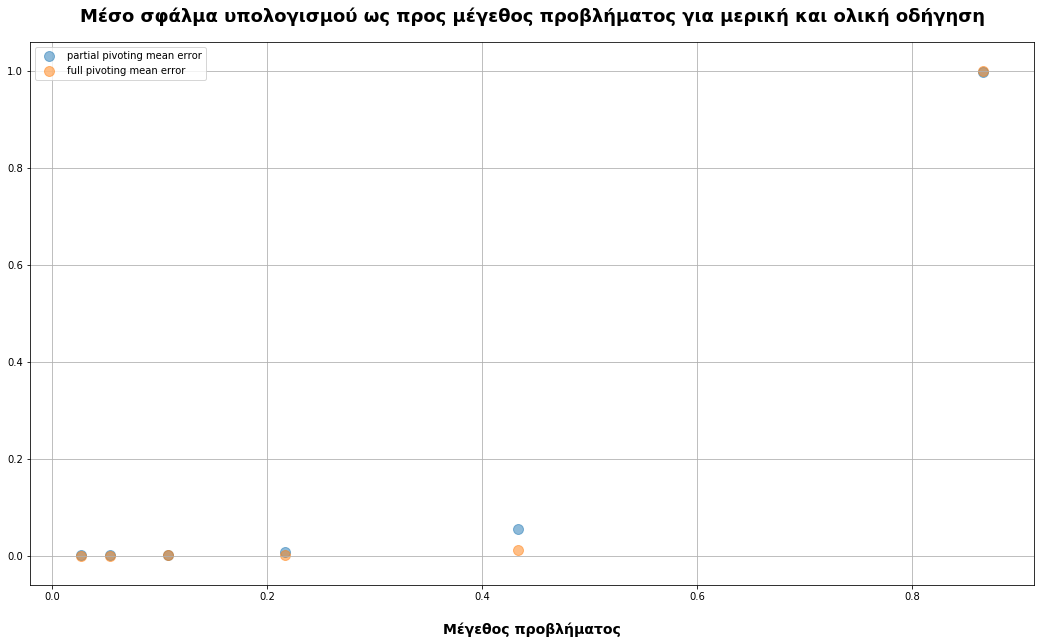

In [43]:
fig, ax = visualization_helper.plot_n_vs_mean_e(
    [pp_iterations_2_m, fp_iterations_2_m], 
    y = 'e_c_inf_norm',
    label = 'Μέσο σφάλμα υπολογισμού ως προς μέγεθος προβλήματος για μερική και ολική οδήγηση', 
    dot_scaling = 10, 
    normalize_axes = True
)

# fig.savefig('graphs/Q2-Mean-ComErr.png')

pass;

#### 2.6. Γράφημα χρόνου υπολογισμού λύσης με μερική οδήγηση και ολική οδήγηση ως προς το μέγεθος του προβλήματος

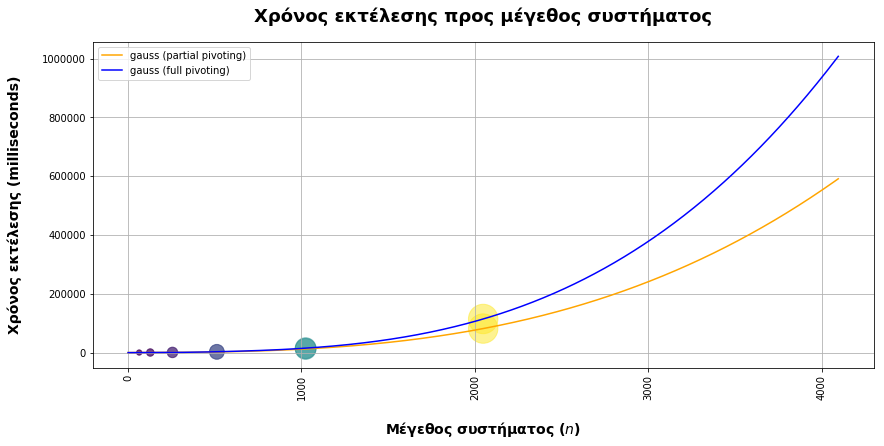

In [39]:
fig, ax = visualization_helper.plot_n_vs_time(
    [pp_iterations_2, fp_iterations_2], 
    x = 'n', 
    y = 'process_time', 
    x_label = 'Μέγεθος συστήματος ($n$)', 
    y_label = 'Χρόνος εκτέλεσης (milliseconds)', 
    label = 'Χρόνος εκτέλεσης προς μέγεθος συστήματος', 
    with_lines = True, 
    interpolation_factor = 1e+0, 
    dot_scaling = 1e+3
)

# fig.savefig('graphs/Q2-N-Time.png')

pass;

Λόγω του μεγάλου εύρους τιμών μεταξύ του δείκτη κατάστασης και των σφαλμάτων και προκειμένου να μπορέσουμε να δημιουργήσουμε τα γραφήματα της άσκησης, προχωρήσαμε σε κανονικοποίηση των αξόνων των αντίστοιχων μεταβλητών. Η κανονικοποίηση έγινε με διαίρεση του διανύσματος των τιμών, για κάθε μεταβλητή, με την αντίστοιχη νόρμα της.

#### Σχόλια

Σχετικά με τον **δείκτη κατάστασης** ως προς το **σφάλμα υπολογισμού** και ως προς το **σφάλμα διόρθωσης** παρατηρούμε, όπως φαίνεται από τα γραφήματα, ότι τα δύο μεγέθη φαίνεται να ακολουθούν ατύπως γραμμική σχέση. Και τα δύο σφάλματα φαίνεται ότι βαίνουν αυξανόμενα, όσο ο δείκτης κατάστασης του πίνακα $\mathbf{Α}$ χειροτερεύει.

Εκτός από την γενικά αυξητική τάση, πάντως, παρατηρείται το φαινόμενο πίνακες με χειρότερο δείκτη κατάστασης να εμφανίζουν μικρότερο σφάλμα υπολογισμού και / ή διόρθωσης. Αυτό αποτυπώνεται στα γραφήματα και δεν φαίνεται να ακολουθεί κάποιο συγκεκριμένο πρότυπο συμπερφοράς αλλά είναι μάλλον τυχαίο φαινόμενο.

Επίσης, φαίνεται ότι το **μέσο σφάλμα υπολογισμού** της μεθόδου **ολικής οδήγησης** είναι μικρότερο απο το αντίστοιχο με τη μέθοδο **μερικής οδήγησης**, γεγονός αναμενόμενο λόγω της μεγαλύτερης αριθμητικής ευστάθειας που επιτυγχάνει η μέθοδος **ολικής οδήγησης**.

Τα παρακάτω γραφήματα απεικονίζουν 6 διαφορετικές εκτελέσεις τυχαίων συστημάτων:

In [39]:
graphs = ''.join([
    "<img style='width: 480px; margin: 0px; float: left; border: none;' src='%s' />" % 
    str(s) for s in sorted(glob('graphs/*Q2*Cond-CompErr-PP*.png'))
])

display(HTML(graphs))

In [40]:
graphs = ''.join([
    "<img style='width: 480px; margin: 0px; float: left; border: none;' src='%s' />" % 
    str(s) for s in sorted(glob('graphs/*Q2*Cond-CompErr-FP*.png'))
])

display(HTML(graphs))

In [41]:
graphs = ''.join([
    "<img style='width: 480px; margin: 0px; float: left; border: none;' src='%s' />" % 
    str(s) for s in sorted(glob('graphs/*Q2*Cond-CorErr-PP*.png'))
])

display(HTML(graphs))

In [42]:
graphs = ''.join([
    "<img style='width: 480px; margin: 0px; float: left; border: none;' src='%s' />" % 
    str(s) for s in sorted(glob('graphs/*Q2*Cond-CorErr-FP*.png'))
])

display(HTML(graphs))

Σχετικά με τον ασυμπτωτικό χρόνο εκτέλεσης, έχουμε τις παρακάτω παρατηρήσεις:
 
 
- Διαισθητικά, η διαδικασία παραγοντοποίησης LU περιλαμβάνει 3 εμφολευμένους βρόγχους (for loops).
 
  
- Η συνολική τάξη πολυπλοκότητας είναι τάξης $O(n^{3})$, κατατμημένη ως προς:

    - Κόστος παραγοντοποίησης: $\frac{2}{3} n^{3} + O(n^{2})$
    - Κόστος προς τα πίσω αντικαταστάσεων: $m n^{2}$
    - Κόστος εμπρός αντικαταστάσεων: $m n^{2}$
    - Συνολικό κόστος: $\frac{2}{3} n^{3} + 2 m n^{2} + O(n^{2})$

όπου $m$ είναι το μέγεθος του $\mathbf{b}_{i}$, $1 \leq i \lt m$.

Παρατηρούμε ότι η επίλυση με με μέθοδο **μερικής οδήγησης** είναι ταχύτερη από την μέθοδο **ολικής οδήγησης**, γεγονός που έχει νόημα αφού η μέθοδος **ολικής οδήγησης** περιλαμβάνει την εύρεση της απόλυτα μεγαλύτερης τιμής του υποπίνακα $\mathbf{Α}_{ij}$, $i = j, \forall i, j \lt n$ καθώς και την εναλλαγή των στηλών, πλέον των γραμμών.

---

## **Ερώτημα 3**

Να πράξετε όλα τα παραπάνω για το σύστημα όπου ο $A_{n}$ έχει στην κύρια διαγώνιο και στην τελευταία στήλη μονάδα, στο κάτω τριγωνικό μέρος −1 και παντού αλλού μηδέν. Τι παρατηρείτε;

### **Απάντηση**

In [40]:
# Execution counter for producing graphs with incremental file names.
run = 0

In [41]:
run += 1

In [42]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [43]:
%matplotlib inline

In [44]:
import sys
from time import gmtime, strftime
import numpy as np

from IPython.display import Image, HTML, display
from glob import glob

In [45]:
sys.path.append('code')

from DataHelper import DataHelper
from GaussianElimination import GaussianElimination
from VisualizationHelper import VisualizationHelper

In [46]:
data_helper = DataHelper()
visualization_helper = VisualizationHelper()

Υλοποιούμε την μέθοδο κατασκευής του πίνακα που απαιτεί η άσκηση:

Παράδειγμα για $n = 8$:

In [47]:
print(data_helper.compute_A_part_3(n = 8))

[[ 1.  0.  0.  0.  0.  0.  0.  1.]
 [-1.  1.  0.  0.  0.  0.  0.  1.]
 [-1. -1.  1.  0.  0.  0.  0.  1.]
 [-1. -1. -1.  1.  0.  0.  0.  1.]
 [-1. -1. -1. -1.  1.  0.  0.  1.]
 [-1. -1. -1. -1. -1.  1.  0.  1.]
 [-1. -1. -1. -1. -1. -1.  1.  1.]
 [-1. -1. -1. -1. -1. -1. -1.  1.]]


In [48]:
# Define problem sizes.
system_sizes = np.array([
    64, 128, 256, 512, 1024, 2048
])

# Produce the system of equations required.
systems_3 = data_helper.compute_systems_part_3(system_sizes)

In [49]:
# Execute iterations for partial pivoting.
pp_iterations_3 = data_helper.compute_gauss_iterations(systems = systems_3, pivoting = 'partial', with_progress_bar = True)

Elimination (n = 2048):  50%|██████████████████████████████████████████████████████████████████▋                                                                   | 1019/2047 [00:17<00:12, 85.40it/s]code\GaussianElimination.py:161: RuntimeWarning: overflow encountered in add
  self.__U[i, :] = (u * self.__U[diag_i, :]) + self.__U[i, :]
Elimination (n = 2048): 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2047/2047 [00:22<00:00, 89.28it/s]


In [50]:
# Execute iterations for full pivoting.
fp_iterations_3 = data_helper.compute_gauss_iterations(systems = systems_3, pivoting = 'full', with_progress_bar = True)

Elimination (n = 2048): 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2047/2047 [00:21<00:00, 95.76it/s]


#### Εκτύπωση στατιστικών

Για τη μέθοδο μερικής οδήγησης

In [51]:
data_helper.print_statistics(pp_iterations_3)

,Μέγεθος προβλήματος (n),Μέθοδος οδήγησης,Χρόνος υπολογισμού (milliseconds),Δείκτης κατάστασης Α,Νόρμα απείρου σφάλματος υπολογισμού,Νόρμα απείρου σφάλματος διόρθωσης
0,64,partial,46.959639,64.0,0.954669,6.523505
1,128,partial,81.997156,128.0,0.988190,38.567999
2,256,partial,288.997173,256.0,511.139999,1018.251533
3,512,partial,1703.952789,512.0,0.993869,229.227844
4,1024,partial,10508.724451,1024.0,511.708364,1022.013524
5,2048,partial,72457.121611,inf,NaN,NaN


Για τη μέθοδο ολικής οδήγησης

In [52]:
data_helper.print_statistics(fp_iterations_3)

,Μέγεθος προβλήματος (n),Μέθοδος οδήγησης,Χρόνος υπολογισμού (milliseconds),Δείκτης κατάστασης Α,Νόρμα απείρου σφάλματος υπολογισμού,Νόρμα απείρου σφάλματος διόρθωσης
0,64,full,55.998564,64.0,0.954669,6.523505
1,128,full,135.997295,128.0,0.988190,38.567999
2,256,full,385.990381,256.0,511.139999,1018.251533
3,512,full,1989.945650,512.0,0.993869,229.227844
4,1024,full,12844.668150,1024.0,511.708364,1022.013524
5,2048,full,91781.620979,inf,NaN,NaN


Στατιστικά σφάλματος

In [53]:
data_helper.print_error_statistics([pp_iterations_3, fp_iterations_3])

,Μέγεθος προβλήματος (n),Δείκτης κατάστασης Α,Νόρμα απείρου σφάλματος υπολογισμού (μερική οδήγηση),Νόρμα απείρου σφάλματος υπολογισμού (ολική οδήγηση),Διαφορά νόρμας απείρου σφάλματος υπολογισμού,Νόρμα απείρου σφάλματος διόρθωσης (μερική οδήγηση),Νόρμα απείρου σφάλματος διόρθωσης (ολική οδήγηση),Διαφορά νόρμας απείρου σφάλματος διόρθωσης
0,64,64.0,0.954669,0.954669,0.0,6.523505,6.523505,0.0
1,128,128.0,0.988190,0.988190,0.0,38.567999,38.567999,0.0
2,256,256.0,511.139999,511.139999,0.0,1018.251533,1018.251533,0.0
3,512,512.0,0.993869,0.993869,0.0,229.227844,229.227844,0.0
4,1024,1024.0,511.708364,511.708364,0.0,1022.013524,1022.013524,0.0
5,2048,inf,NaN,NaN,NaN,NaN,NaN,NaN


#### Επανεκτέλεση των βημάτων με εξαίρεση της διάστασης $n = 2048$, λόγω αριθμητικών σφαλμάτων, για παραγωγή γραφημάτων.
(Bλέπε σχόλια)

In [54]:
# Define problem sizes.
system_sizes = np.array([
    64, 128, 256, 512, 1024
])

# Produce the system of equations required.
systems_3_g = data_helper.compute_systems_part_3(system_sizes)

In [55]:
# Execute iterations for partial pivoting.
pp_iterations_3_g = data_helper.compute_gauss_iterations(systems = systems_3_g, pivoting = 'partial', with_progress_bar = True)

Elimination (n = 1024): 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1023/1023 [00:04<00:00, 254.10it/s]


In [56]:
# Execute iterations for full pivoting.
fp_iterations_3_g = data_helper.compute_gauss_iterations(systems = systems_3_g, pivoting = 'full', with_progress_bar = True)

Elimination (n = 1024): 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1023/1023 [00:03<00:00, 260.05it/s]


#### 3.1. Γράφημα κατάστασης του πίνακα $A$ ως προς το σφάλμα υπολογισμού με μερική οδήγηση

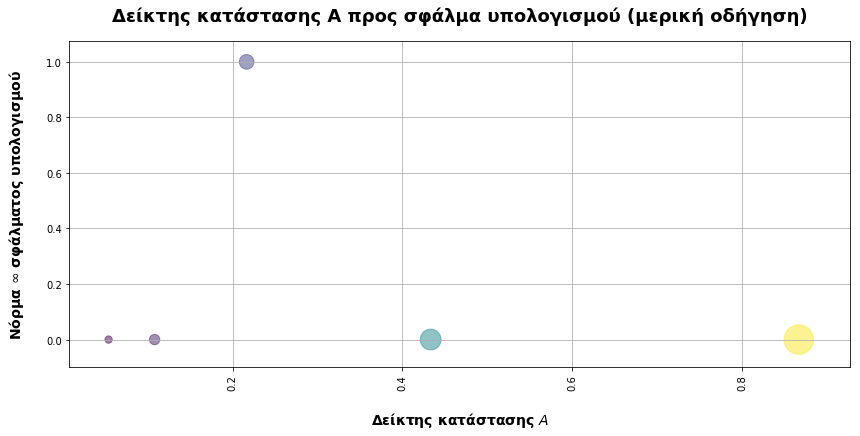

In [57]:
fig, ax = visualization_helper.plot_k_vs_e(
    pp_iterations_3_g, 
    x = 'K_A', 
    y = 'e_c_inf_norm', 
    x_label = 'Δείκτης κατάστασης $A$', 
    y_label = 'Νόρμα $\infty$ σφάλματος υπολογισμού', 
    label = 'Δείκτης κατάστασης A προς σφάλμα υπολογισμού (μερική οδήγηση)', 
    with_lines = False, 
    interpolation_factor = None, 
    dot_scaling = 1e+3, 
    normalize_axes = True
)

# fig.savefig('graphs/' + str(run) + '-Q3-Cond-CompErr-PP' + '.png')

pass;

#### 3.2. Γράφημα κατάστασης του πίνακα $A$ ως προς το σφάλμα υπολογισμού με ολική οδήγηση

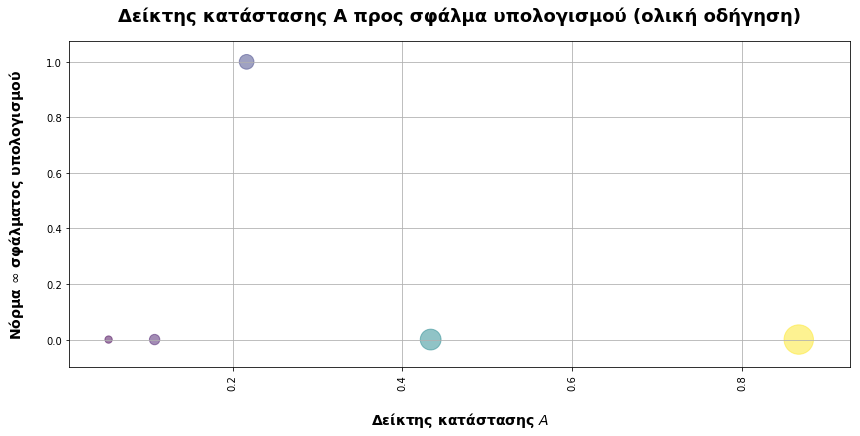

In [58]:
fig, ax = visualization_helper.plot_k_vs_e(
    fp_iterations_3_g, 
    x = 'K_A', 
    y = 'e_c_inf_norm', 
    x_label = 'Δείκτης κατάστασης $A$', 
    y_label = 'Νόρμα $\infty$ σφάλματος υπολογισμού', 
    label = 'Δείκτης κατάστασης A προς σφάλμα υπολογισμού (ολική οδήγηση)', 
    with_lines = False, 
    interpolation_factor = None, 
    dot_scaling = 1e+3, 
    normalize_axes = True
)

# fig.savefig('graphs/' + str(run) + '-Q3-Cond-CompErr-FP' + '.png')

pass;

#### 3.3. Γράφημα κατάστασης του πίνακα $A$ ως προς το σφάλμα διόρθωσης με μερική οδήγηση

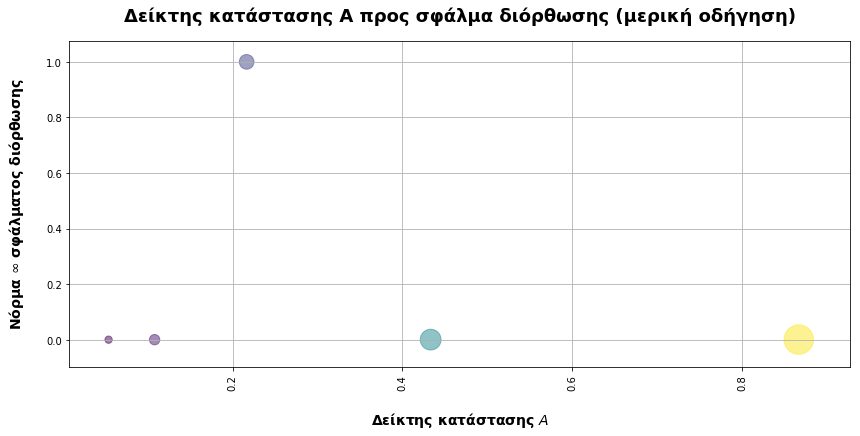

In [59]:
fig, ax = visualization_helper.plot_k_vs_e(
    pp_iterations_3_g, 
    x = 'K_A', 
    y = 'e_r_inf_norm', 
    x_label = 'Δείκτης κατάστασης $A$', 
    y_label = 'Νόρμα $\infty$ σφάλματος διόρθωσης', 
    label = 'Δείκτης κατάστασης A προς σφάλμα διόρθωσης (μερική οδήγηση)', 
    with_lines = False, 
    interpolation_factor = None, 
    dot_scaling = 1e+3, 
    normalize_axes = True
)

# fig.savefig('graphs/' + str(run) + '-Q3-Cond-CorErr-PP' + '.png')

pass;

#### 3.4. Γράφημα κατάστασης του πίνακα $A$ ως προς το σφάλμα διόρθωσης με ολική οδήγηση

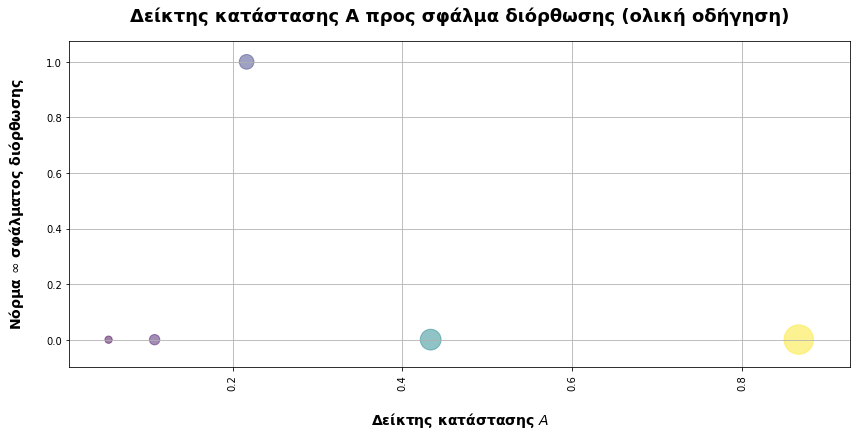

In [60]:
fig, ax = visualization_helper.plot_k_vs_e(
    fp_iterations_3_g, 
    x = 'K_A', 
    y = 'e_r_inf_norm', 
    x_label = 'Δείκτης κατάστασης $A$', 
    y_label = 'Νόρμα $\infty$ σφάλματος διόρθωσης', 
    label = 'Δείκτης κατάστασης A προς σφάλμα διόρθωσης (ολική οδήγηση)', 
    with_lines = False, 
    interpolation_factor = None, 
    dot_scaling = 1e+3, 
    normalize_axes = True
)

# fig.savefig('graphs/' + str(run) + '-Q3-Cond-CorErr-FP' + '.png')

pass;

##### 3.5 Μέσο σφάλμα υπολογισμού ανά μέγεθος προβλήματος και μερική & ολική οδήγηση

Ομοίως με το ερώτημα 2, προκειμένου να υπολογίσουμε το **μέσο σφάλμα υπολογισμού** για κάθε μέθοδο, είμαστε υποχρεωμένοι να εκτελέσουμε πολλές επαναλήψεις, για το ίδιο μέγεθος προβλήματος, καθώς τα συστήματα που παράγονται είναι τυχαία. 

In [186]:
%%time

# Define problem sizes.
system_sizes = np.array([
    64, 128, 256, 512, 1024,
    64, 128, 256, 512, 1024,
    64, 128, 256, 512, 1024,
    64, 128, 256, 512, 1024,
    64, 128, 256, 512, 1024,
    64, 128, 256, 512, 1024,
    64, 128, 256, 512, 1024,
    64, 128, 256, 512, 1024,
    64, 128, 256, 512, 1024,
    64, 128, 256, 512, 1024
])

# Produce the system of equations required.
systems_3_m = data_helper.compute_systems_part_3(system_sizes)

CPU times: user 1.01 s, sys: 15.5 ms, total: 1.02 s
Wall time: 129 ms


In [187]:
%%time

# Execute iterations for partial pivoting.
pp_iterations_3_m = data_helper.compute_gauss_iterations(systems = systems_3_m, pivoting = 'partial', with_progress_bar = False)

CPU times: user 1min 59s, sys: 663 ms, total: 1min 59s
Wall time: 38.7 s


In [188]:
%%time

# Execute iterations for full pivoting.
fp_iterations_3_m = data_helper.compute_gauss_iterations(systems = systems_3_m, pivoting = 'full', with_progress_bar = False)

CPU times: user 2min 33s, sys: 1.13 s, total: 2min 34s
Wall time: 44.3 s


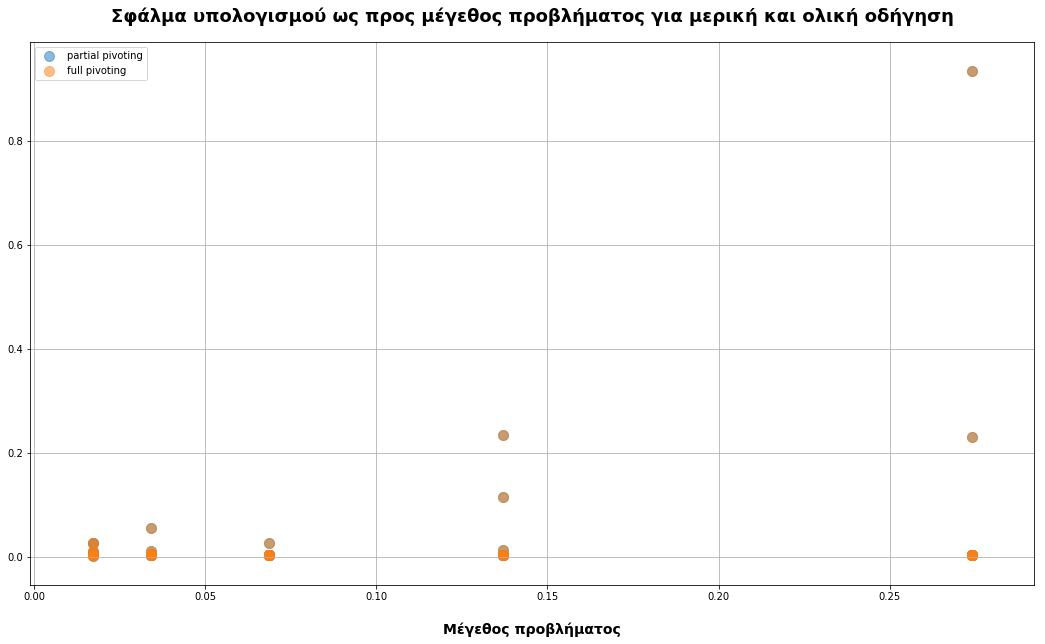

In [189]:
fig, ax = visualization_helper.plot_n_vs_e(
    [pp_iterations_3_m, fp_iterations_3_m], 
    y = 'e_c_inf_norm',
    label = 'Σφάλμα υπολογισμού ως προς μέγεθος προβλήματος για μερική και ολική οδήγηση', 
    dot_scaling = 10, 
    normalize_axes = True
)

# fig.savefig('graphs/' + str(run) + '-Q3-Multiple-ComErr' + '.png')

pass;

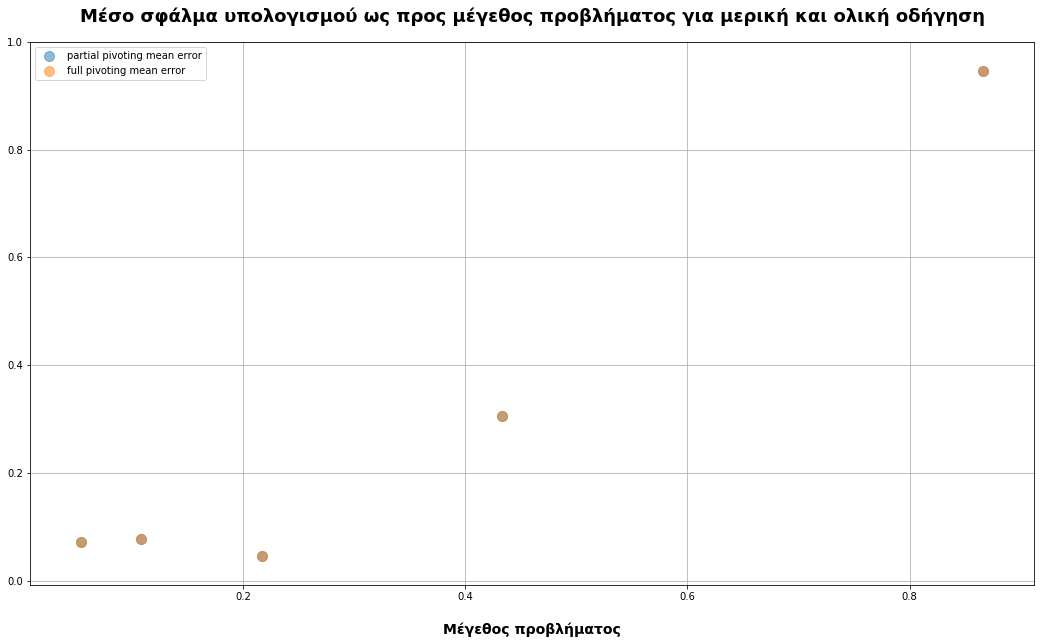

In [190]:
fig, ax = visualization_helper.plot_n_vs_mean_e(
    [pp_iterations_3_m, fp_iterations_3_m], 
    y = 'e_c_inf_norm',
    label = 'Μέσο σφάλμα υπολογισμού ως προς μέγεθος προβλήματος για μερική και ολική οδήγηση', 
    dot_scaling = 10, 
    normalize_axes = True
)

# fig.savefig('graphs/' + str(run) + '-Q3-Mean-ComErr' + '.png')

pass;

#### 3.5. Γράφημα χρόνου υπολογισμού λύσης με μερική οδήγηση και ολική οδήγηση ως προς το μέγεθος του προβλήματος

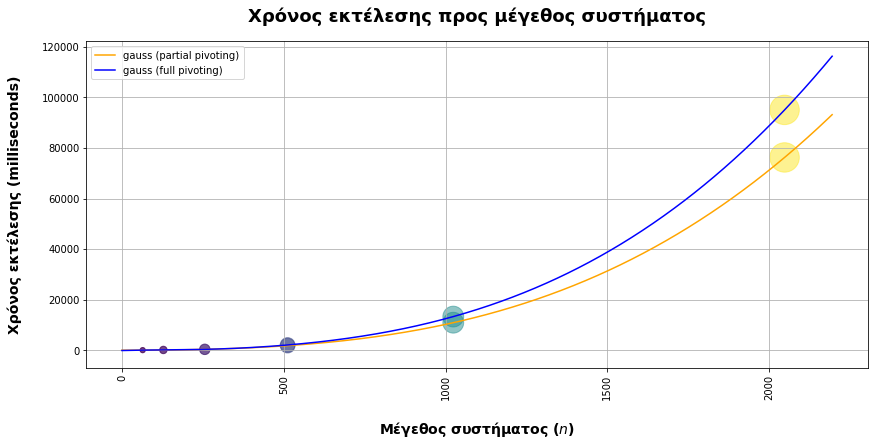

In [42]:
fig, ax = visualization_helper.plot_n_vs_time(
    [pp_iterations_3, fp_iterations_3], 
    x = 'n', 
    y = 'process_time', 
    x_label = 'Μέγεθος συστήματος ($n$)',
    y_label = 'Χρόνος εκτέλεσης (milliseconds)', 
    label = 'Χρόνος εκτέλεσης προς μέγεθος συστήματος', 
    with_lines = True, 
    interpolation_factor = 1e-1, 
    dot_scaling = 1e+3
)

# fig.savefig('graphs/Q3-N-Time.png')

pass;

### Σχόλια

Παρατηρούμε ότι η επίλυση του συστήματος παρουσιάζει αριθμητικά σφάλματα υπερχείλεισης, όπως υποδηλώνονται από τα σφάλματα που αναφέρει η προειδοποίηση της *Python*: *RuntimeWarning: overflow encountered in double_scalars*. Η ίδια εικόνα παρατηρείται και στους πίνακες στατιστικών όπου, από $n = 1024$ και άνω, παρουσιάζονται σφάλματα υπερχείλισης.

Εξ' αιτίας του φαινομένου αυτού, αναγκαστήκαμε να εξαιρέσουμε τις τιμές NaN και inf από την δημιουργία γραφημάτων, καθώς δεν κατέστη δυνατόν να αναπαραστήσουμε τέτοιες ακραίες τιμές γραφικά.

Τα παρακάτω γραφήματα απεικονίζουν 6 διαφορετικές εκτελέσεις τυχαίων συστημάτων:

In [43]:
graphs = ''.join([
    "<img style='width: 480px; margin: 0px; float: left; border: none;' src='%s' />" % 
    str(s) for s in sorted(glob('graphs/*Q3*Cond-CompErr-PP*.png'))
])

display(HTML(graphs))

In [44]:
graphs = ''.join([
    "<img style='width: 480px; margin: 0px; float: left; border: none;' src='%s' />" % 
    str(s) for s in sorted(glob('graphs/*Q3*Cond-CompErr-FP*.png'))
])

display(HTML(graphs))

In [45]:
graphs = ''.join([
    "<img style='width: 480px; margin: 0px; float: left; border: none;' src='%s' />" % 
    str(s) for s in sorted(glob('graphs/*Q3*Cond-CorErr-PP*.png'))
])

display(HTML(graphs))

In [46]:
graphs = ''.join([
    "<img style='width: 480px; margin: 0px; float: left; border: none;' src='%s' />" % 
    str(s) for s in sorted(glob('graphs/*Q3*Cond-CorErr-FP*.png'))
])

display(HTML(graphs))

Ως προς τα σφάλματα των μεθόδων, παρατηρούμε τα εξής:

- Ως προς το **σφάλμα υπολογισμού**, και οι δύο μέθοδοι παρουσιάζουν σχεδόν σταθερή σχέση ως προς τον δείκτη κατάστασης του πίνακα $\mathbf{A}$, εξαιρουμένων περιπτώσεων που υπάρχουν τυχαίες ακραίες τιμές.

- Ως προς το **σφάλμα διόρθωσης**, και οι δύο μέθοδοι συνδέονται με ξεκάθαρη γραμμική σχεση ως προς τον δείκτη κατάστασης του πίνακα $\mathbf{A}$.

Ως προς το ασυμπτωτικό κόστος επίλυσης, τάξη μεγέθους παραμένει $O(n^{3})$, πάντως προκύπτει διαγραμματικά ότι οι δύο μέθοδοι συγκλίνουν.

---

## **Ερώτημα 4**

Χρησιμοποιώντας κατάλληλα τις $\mathbf{L} \mathbf{U}$ αναλύσεις με μερική οδήγηση του πρώτου ερωτήματος, να λύσετε σε χρόνο $O(n^{2})$, τα συστήματα $(\mathbf{A} + \mathbf{u} \mathbf{v}^{T}) \mathbf{x} = \mathbf{b}$ όπου $\mathbf{A}$ οι πίνακες του πρώτου ερωτήματος και $\mathbf{u}$, $\mathbf{v}$ τυχαία διανύσματα με $\lVert \mathbf{u} \lVert_{2}, \lVert \mathbf{v} \lVert_{2} = 1$ σε χρόνο. Επιβεβαιώστε από τους χρόνους εκτέλεσης των προγραμμάτων σας, ότι ο αλγόριθμος σας είναι πράγματι αυτής της τάξης.

### **Απάντηση**

Η μέθοδος *Sherman-Morisson* αποτελεί έναν εύκολο τρόπο επίλυσης του συστήματος

$$\mathbf{B} \mathbf{x} := (\mathbf{A} + \mathbf{U}\mathbf{V})\mathbf{x} = \mathbf{b}$$

(πηγή: Π. Βασσάλος, *Direct Methods*, *Σημειώσεις ΟΠΑ M.Sc. in Data Science*, slide 10)

Οι συνθήκες που απαιτεί η μέθοδος *Sherman–Morrison* είναι οι εξής:

- $\mathbf{A} \in R^{nxn}$ (ικανοποιείται από την διατύπωση του προβλήματος)
- Ο πίνακας $\mathbf{A}$ είναι αντιστρέψιμος (ικανοποιείται από την τυχαιότητα των παραγόμενων συστημάτων)
- Τα διανύσματα-στήλες $\mathbf{u}$, $\mathbf{v}$ $\in R^{n}$ (ικανοποιείται από την διατύπωση του προβλήματος)

Τότε, ο πίνακας $\mathbf{A}$ είναι αντιστρέψιμος αν και μόνο αν $1 + \mathbf{v}^{T} \mathbf{A}^{-1} \mathbf{u} \neq 0$.

Στην πράξη, καλούμαστε να υπολογίσουμε την ποσότητα

$$
\mathbf{A}^{-1} + \mathbf{A}^{-1} \mathbf{u} (1 - \mathbf{v}^{T} \mathbf{A}^{-1} \mathbf{u})^{-1} \mathbf{v}^{T} \mathbf{A}^{-1} =
(\mathbf{A} - \mathbf{u} \mathbf{v}^{T})^{-1}
$$

της οποίας ο ασυμπτωτικός χρόνος εκτέλεσης είναι τάξης $O(n^{2})$, σε αντιδιαστολή με τον χρόνο $O(n^{3})$ που απαιτείται για την αντιστροφή του πίνακα $\mathbf{A}$.

Δεδομένου ότι έχουμε ήδη προβεί σε αναλύσεις $\mathbf{L} \mathbf{U}$ του $\mathbf{A}$ από το πρώτο ερώτημα η διαδικασία απαιτεί μόνο τριγωνική επίλυση και εσωτερικά γινόμενα.

Η διαδικασία επίλυσης είναι η εξής:

- Επίλυση του $\mathbf{A} \mathbf{z} = \mathbf{u}$ ως προς $\mathbf{z}$, έτσι ώστε $\mathbf{z} = \mathbf{A}^{-1} \mathbf{u}$

- Επίλυση του $\mathbf{A} \mathbf{y} = \mathbf{b}$ ως προς $\mathbf{y}$, έτσι ώστε $\mathbf{y} = \mathbf{A}^{-1} \mathbf{b}$

- Επίλυση του $\mathbf{x} = \mathbf{y} + ((\mathbf{v}^{T} \mathbf{y}) / (1 - \mathbf{v}^{T} \mathbf{z})) \mathbf{z}$

(πηγή: *Princeton*, *COS 323*, *Solving Linear Systems: Iterative Methods and Sparse Systems*, https://www.cs.princeton.edu/courses/archive/fall11/cos323/notes/cos323_f11_lecture06_linsys2.pdf)

In [47]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [48]:
%matplotlib inline

In [49]:
import sys
from time import gmtime, strftime
import numpy as np

from IPython.display import Image, HTML, display
from glob import glob

In [50]:
sys.path.append('code')

from DataHelper import DataHelper
from ShermanMorisson import ShermanMorisson
from VisualizationHelper import VisualizationHelper

In [51]:
data_helper = DataHelper()
visualization_helper = VisualizationHelper()

### Επικύρωση υλοποίησης

#### Ελέγος της υλοποίησης παραγωγής τυχαίων διανυσμάτων $\mathbf{u}$, $\mathbf{v}$ με $ \lVert \mathbf{u} \lVert _{2}, \lVert \mathbf{v} \lVert_{2} = 1$

Ζητείται η εφαρμογή τυχαίων διανυσμάτων $\mathbf{x}$ ώστε $\lVert \mathbf{x} \lVert_{2} = 1$. Προκειμένου να επιτύχουμε την δημιουργία τέτοιων διανυσμάτων, δημιουργούμε τυχαίο n-διάνυσμα και το διαιρούμε με την $L2$ νόρμα του.

Παράδειγμα για $n = 8$:

In [52]:
%%time

v = data_helper.compute_vector_with_norm_one(n = 8, norm = 2)

Wall time: 2 ms


In [53]:
print(v)

[0.38995548 0.32705076 0.14041383 0.18421733 0.57809507 0.11357154
 0.49758354 0.30436601]


In [54]:
%%time

v_L2 = np.linalg.norm(v, 2)

Wall time: 0 ns


Έλεγχος ώστε να διαπιστωθεί ότι η $L2$ νόρμα του διανύσματος είναι 1:

In [55]:
print(np.allclose(v_L2, 1, rtol = 1e-16))

True


#### Έλεγχος υλοποίησης της μεθόδου *Sherman-Morisson*

In [56]:
sherman_morisson = ShermanMorisson()

# Retrieving the iteration for n = 64, from Q2
n = pp_iterations_2[0]['n']
P = pp_iterations_2[0]['P']
Q = pp_iterations_2[0]['Q']
L = pp_iterations_2[0]['L']
U = pp_iterations_2[0]['U']
b = pp_iterations_2[0]['b']
x_hat_gauss = pp_iterations_2[0]['x']

# For testing
A = pp_iterations_2[1]['A']

sherman_morisson = sherman_morisson.solve(n = n, P = P, L = L, U = U, b = b)
x_hat_sherman_morisson = sherman_morisson.x

In [57]:
print(x_hat_gauss)

[7.22692022e-01 8.10442712e-02 9.89172897e-01 7.85898887e-01
 5.52866128e-01 9.81011929e-01 8.41607855e-02 3.07131766e-01
 1.46578953e-02 3.36462854e-01 7.24285267e-01 7.20253084e-01
 8.33857093e-01 5.39662075e-01 6.20936660e-01 4.01792594e-01
 8.59570667e-01 2.98162923e-01 3.42200310e-02 3.96816204e-01
 9.84006009e-01 5.35423525e-01 7.69048304e-02 1.36773527e-02
 3.68895635e-01 1.83665693e-02 5.95763691e-01 5.16589128e-01
 9.92947088e-01 7.39222307e-01 7.10231433e-01 1.55639936e-01
 4.28283791e-01 7.74663664e-01 3.15686595e-01 6.48293364e-01
 7.28457788e-04 1.35584368e-01 9.10021082e-01 5.93795687e-01
 6.40114672e-01 2.88669719e-01 7.43545977e-02 2.74015321e-01
 5.02964654e-01 9.77152594e-01 4.16977288e-01 3.55438928e-01
 3.63701370e-02 4.86872967e-01 3.04377347e-01 2.09609280e-01
 2.00247091e-01 3.22067696e-01 3.69433245e-01 5.83939005e-02
 5.66246635e-01 2.30509945e-01 9.72956984e-01 1.92262304e-01
 3.09566077e-03 6.55808073e-01 1.32153778e-01 7.63724972e-01]


In [58]:
print(x_hat_sherman_morisson)

[7.35277504e-01 7.77549714e-02 9.92230437e-01 8.04795940e-01
 5.55841074e-01 9.78365906e-01 8.03505967e-02 3.05141489e-01
 1.47347804e-02 3.33096115e-01 7.15554379e-01 7.33720813e-01
 8.38384994e-01 5.26290298e-01 6.24288037e-01 4.03546089e-01
 9.08044482e-01 3.03113962e-01 3.43034910e-02 3.96699314e-01
 9.95822067e-01 5.40752860e-01 7.78214606e-02 1.38079663e-02
 3.68497943e-01 1.82177337e-02 5.90916355e-01 5.19287904e-01
 9.70766961e-01 7.24844471e-01 6.93967468e-01 1.55358999e-01
 4.31763818e-01 7.73501117e-01 3.15945200e-01 6.47242261e-01
 7.62061766e-04 1.35869788e-01 9.34415681e-01 5.87150637e-01
 6.39483293e-01 2.76300661e-01 7.51570510e-02 2.91770681e-01
 5.07938444e-01 9.85168866e-01 4.27232148e-01 3.56326407e-01
 3.58735491e-02 4.86517042e-01 3.02305636e-01 2.08650517e-01
 1.96710857e-01 3.14701495e-01 3.70358280e-01 5.76109758e-02
 5.77262624e-01 2.26174151e-01 9.78708292e-01 1.91469410e-01
 3.09111528e-03 6.71689427e-01 1.29579857e-01 7.36971537e-01]


In [59]:
print(np.allclose(x_hat_gauss, x_hat_sherman_morisson, rtol = 1e-1))

True


#### 4.1. Γράφημα χρόνου υπολογισμού λύσης με μέθοδο Sherman-Morisson

In [60]:
sm_iterations_4 = data_helper.compute_sherman_morisson_iterations(pp_iteration_results = pp_iterations_2)

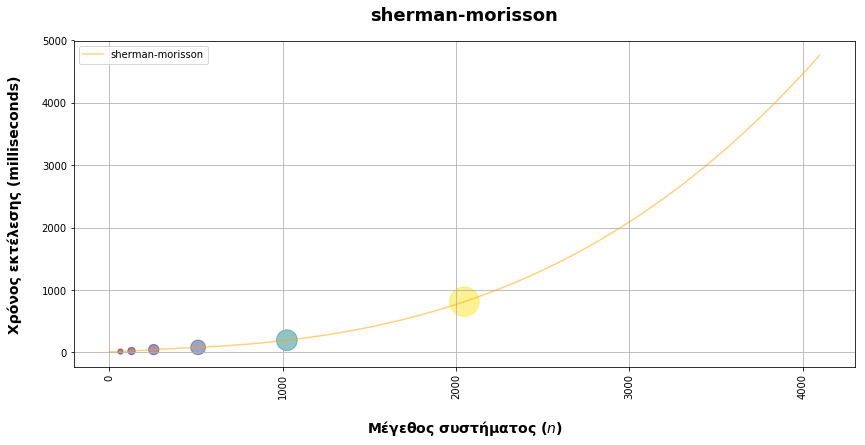

In [61]:
fig, ax = visualization_helper.plot_n_vs_time(
    [sm_iterations_4], 
    x = 'n', 
    y = 'process_time', 
    x_label = 'Μέγεθος συστήματος ($n$)',
    y_label = 'Χρόνος εκτέλεσης (milliseconds)', 
    label = 'Χρόνος εκτέλεσης Sherman-Morisson προς μέγεθος συστήματος', 
    with_lines = True, 
    interpolation_factor = 1e+0, 
    dot_scaling = 1e+3
)

# fig.savefig('graphs/Q4-N-Time.png')

pass;

#### Σχόλια

Το διάγραμμα μεγέθους προβλήματος προς χρόνο εκτέλεσης μας οδηγεί στο συμπέρασμα ότι η ασυμπτωτική πολυπλοκότητα υπολογισμού είναι πράγματι της τάξης $O(n^{2})$.

---